In [115]:
# Welcom to ISE prject working area.

In [116]:
#Imports Area.
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np

In [117]:
#Showing the data and define it.
df = pd.read_csv("supermarket_sales.csv")
display(df)
describeDf = pd.DataFrame([['Invoice ID', 'Product\'s identification number.', 'Categorical'], ['Branch', 'Supermarket supercenters IDs.', 'Categorical'],
                          ['City', 'Location of supercenters.', 'Categorical'], ['Customer type', 'Identify whether the customer has a member card or doesnt have.', 'Categorical'],
                          ['Gender', 'Male or Female', 'Categorical'], ['Product line', 'Product\'s categorization groups.', 'Categorical'],
                          ['Unit price', 'Price of each product in $.', 'Numerical'], ['Quantity', 'Number of products purchased by customer.', 'Numerical'],
                          ['Tax 5%', '5% tax fee for customer buying.', 'Numerical'], ['Total', 'Total price including tax.', 'Numerical'],
                          ['Date', 'Date of purchase.', 'Categorical'], ['Time', 'Purchase time.', 'Numerical'],
                          ['Payment', 'Payment method used by customer for purchase.', 'Categorical'], ['cogs', 'Cost of goods on the supermarket.', "Numerical"],
                          ['gross margin percentage', 'The percentage of the profit.', 'Numerical'], ['gross income', 'The actual amount of profit.', 'Numerical'],
                          ['Rating', 'Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).', 'Numerical']],
                  columns=['Variable', 'Description', 'Type'])
display(describeDf)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,NaN,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,NaN,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.49,3/2/2019,17:16,NaN,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.432,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.111,2/22/2019,15:33,NaN,65.82,4.761905,3.2910,4.1


,Variable,Description,Type
0,Invoice ID,Product's identification number.,Categorical
1,Branch,Supermarket supercenters IDs.,Categorical
2,City,Location of supercenters.,Categorical
3,Customer type,Identify whether the customer has a member car...,Categorical
4,Gender,Male or Female,Categorical
5,Product line,Product's categorization groups.,Categorical
6,Unit price,Price of each product in $.,Numerical
7,Quantity,Number of products purchased by customer.,Numerical
8,Tax 5%,5% tax fee for customer buying.,Numerical
9,Total,Total price including tax.,Numerical


In [118]:
#Showing the datatype of the colomns to see if there is inconsistency.
df.info()
print("\nThere are inconsistencies in Total and Time columns")

#Fixing the inconsistency.
df["Total"]=df["Total"].apply(lambda x: float(x.replace(",","")))

#Fixing the time in order to treat it like an integer that represents the hours.
time = []
for i in df['Time']:
    lis = i.split(":")
    time.append(int(lis[0]))
df.drop("Time", inplace=True, axis=1)
df['Time'] = time

df.info()

#Deleting the data that we do not need.
df.drop("Invoice ID", inplace=True, axis=1)
df.drop("gross margin percentage", inplace=True, axis=1)
df.drop("Branch", inplace=True, axis = 1)
df.drop("Time", inplace=True, axis = 1)

#Filing the empty cells.
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)

for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0] 
    df[c].fillna(value,inplace=True)
    

display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     996 non-null    object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             996 non-null    object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   object 
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  994 non-null    object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4
3,Yangon,Member,Male,Fashion accessories,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet,40.35,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,Ewallet,973.80,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,Cash,31.84,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Ewallet,65.82,3.2910,4.1


From the graph it can be conclude that tax, cogs, gross income, and total have outliers


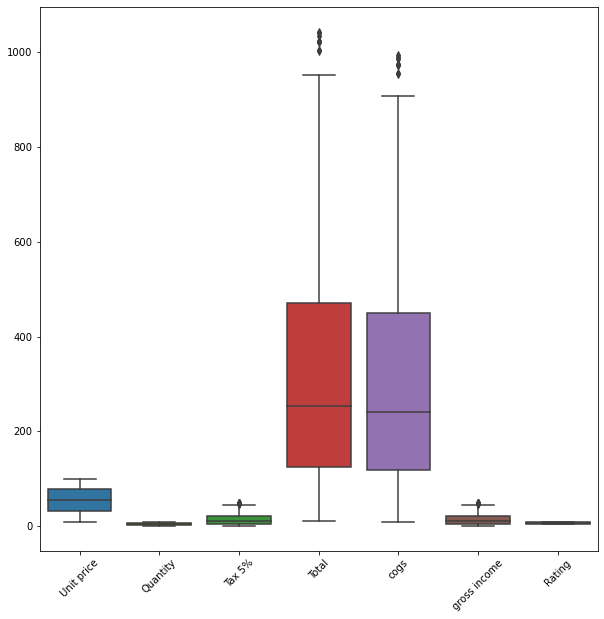

In [119]:
#Checking if there are outliers in the data frame.
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45);
print("From the graph it can be conclude that tax, cogs, gross income, and total have outliers")

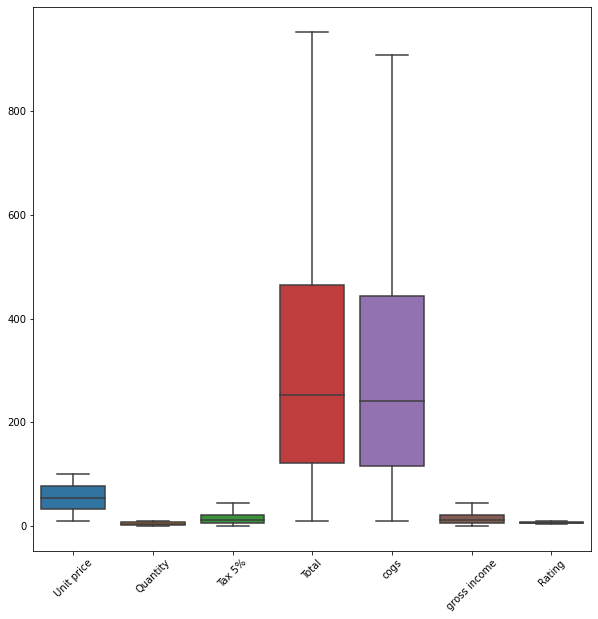

In [120]:
# Removing the outliers
outliersList = ['Tax 5%', 'Total', 'cogs', 'gross income']
for i in outliersList:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1
    selected_rows=(df[i] < (Q3 + 1.5 * IQR))
    selected_index=df[~selected_rows].index
    df.drop(index=selected_index,inplace=True)
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45);

In [121]:
# Data Manipulation/Transformation

day, month, year = [], [], []
for i in df['Date']:
    lis = i.split("/")
    month.append(int(lis[0]))
    day.append(int(lis[1]))
    year.append(int(lis[2]))
df['Day'] = day
df['Month'] = month
df['Year'] = year
df.drop("Date", inplace=True, axis=1)
pl_mapping = {'Yangon':1,'Naypyitaw':2, 'Mandalay':3}
df['City'] = df['City'].map(pl_mapping)
pl_mapping = {'Health and beauty':1,'Electronic accessories':2, "Home and lifestyle":3, "Fashion accessories":4, "Sports and travel":5, "Food and beverages":6}
df['Product line'] = df['Product line'].map(pl_mapping)
display(df)
for col in ['Customer type', 'Gender']:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    df[col]=encoder.transform(df[col])
    
for col in ['Payment']:
    df = pd.get_dummies(df, columns=[col],drop_first=False)
display(df)
print("Female is represented as 0 and male is represented as 1\nMemeber is represented as 0 and normal is represented as 1")


display(df)

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Day,Month,Year
0,1,Member,Female,1,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,5,1,2019
1,2,Normal,Female,2,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,8,3,2019
2,1,Normal,Male,3,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,3,2019
3,1,Member,Male,4,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,27,1,2019
4,1,Normal,Male,5,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,Member,Female,2,60.95,1,3.0475,63.9975,Ewallet,60.95,3.0475,5.9,18,2,2019
995,2,Normal,Male,1,40.35,1,2.0175,42.3675,Ewallet,40.35,2.0175,6.2,29,1,2019
997,1,Member,Male,6,31.84,1,1.5920,33.4320,Cash,31.84,1.5920,7.7,9,2,2019
998,1,Normal,Male,3,65.82,1,3.2910,69.1110,Ewallet,65.82,3.2910,4.1,22,2,2019


,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Day,Month,Year,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,1,74.69,7,26.1415,548.9715,522.83,26.1415,9.1,5,1,2019,0,0,1
1,2,1,0,2,15.28,5,3.8200,80.2200,76.40,3.8200,9.6,8,3,2019,1,0,0
2,1,1,1,3,46.33,7,16.2155,340.5255,324.31,16.2155,7.4,3,3,2019,0,1,0
3,1,0,1,4,58.22,8,23.2880,489.0480,465.76,23.2880,8.4,27,1,2019,0,0,1
4,1,1,1,5,86.31,7,30.2085,634.3785,604.17,30.2085,5.3,8,2,2019,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,0,0,2,60.95,1,3.0475,63.9975,60.95,3.0475,5.9,18,2,2019,0,0,1
995,2,1,1,1,40.35,1,2.0175,42.3675,40.35,2.0175,6.2,29,1,2019,0,0,1
997,1,0,1,6,31.84,1,1.5920,33.4320,31.84,1.5920,7.7,9,2,2019,1,0,0
998,1,1,1,3,65.82,1,3.2910,69.1110,65.82,3.2910,4.1,22,2,2019,0,0,1


Female is represented as 0 and male is represented as 1
Memeber is represented as 0 and normal is represented as 1


,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Day,Month,Year,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,1,74.69,7,26.1415,548.9715,522.83,26.1415,9.1,5,1,2019,0,0,1
1,2,1,0,2,15.28,5,3.8200,80.2200,76.40,3.8200,9.6,8,3,2019,1,0,0
2,1,1,1,3,46.33,7,16.2155,340.5255,324.31,16.2155,7.4,3,3,2019,0,1,0
3,1,0,1,4,58.22,8,23.2880,489.0480,465.76,23.2880,8.4,27,1,2019,0,0,1
4,1,1,1,5,86.31,7,30.2085,634.3785,604.17,30.2085,5.3,8,2,2019,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,0,0,2,60.95,1,3.0475,63.9975,60.95,3.0475,5.9,18,2,2019,0,0,1
995,2,1,1,1,40.35,1,2.0175,42.3675,40.35,2.0175,6.2,29,1,2019,0,0,1
997,1,0,1,6,31.84,1,1.5920,33.4320,31.84,1.5920,7.7,9,2,2019,1,0,0
998,1,1,1,3,65.82,1,3.2910,69.1110,65.82,3.2910,4.1,22,2,2019,0,0,1


## exploratory data analysis:

### i. statical summary

In [122]:
#statical summary
display(df.describe())

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Day,Month,Year,Payment_Cash,Payment_Credit card,Payment_Ewallet
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.0,991.000000,991.000000,991.000000
mean,1.988900,0.497477,0.500505,3.558022,55.292482,5.469223,15.076417,316.604752,301.528335,15.076417,6.973629,15.278507,1.996973,2019.0,0.343088,0.306761,0.350151
std,0.823198,0.500246,0.500252,1.697417,26.311619,2.905031,11.319504,237.709589,226.390085,11.319504,1.709512,8.701163,0.835446,0.0,0.474980,0.461382,0.477258
min,1.000000,0.000000,0.000000,1.000000,10.080000,1.000000,0.508500,10.678500,10.170000,0.508500,4.000000,1.000000,1.000000,2019.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,32.665000,3.000000,5.817500,122.167500,116.350000,5.817500,5.550000,8.000000,1.000000,2019.0,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,4.000000,54.840000,5.000000,12.036000,252.756000,240.720000,12.036000,6.966667,15.000000,2.000000,2019.0,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,5.000000,77.485000,8.000000,22.127000,464.667000,442.540000,22.127000,8.400000,23.000000,3.000000,2019.0,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,6.000000,99.960000,10.000000,45.325000,951.825000,906.500000,45.325000,10.000000,31.000000,3.000000,2019.0,1.000000,1.000000,1.000000


### ii. univariate graphs

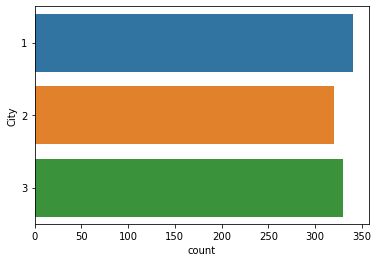

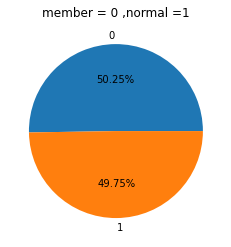

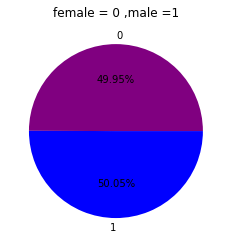

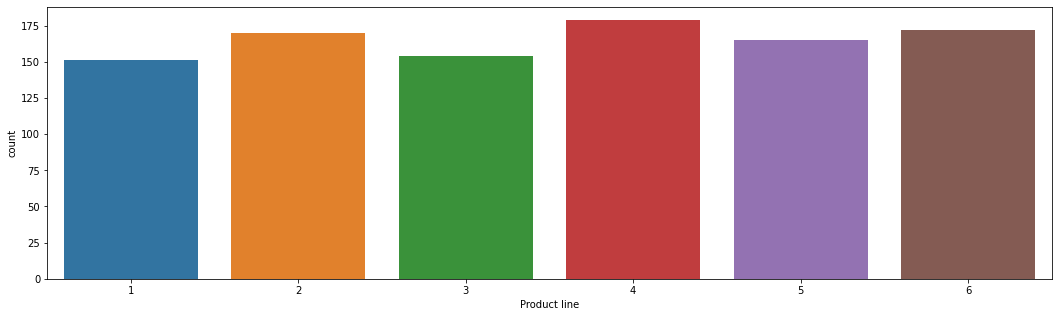

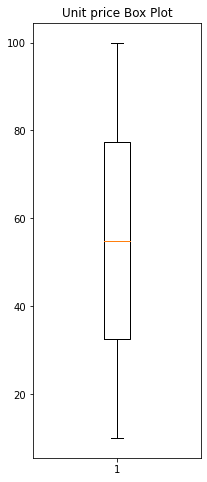

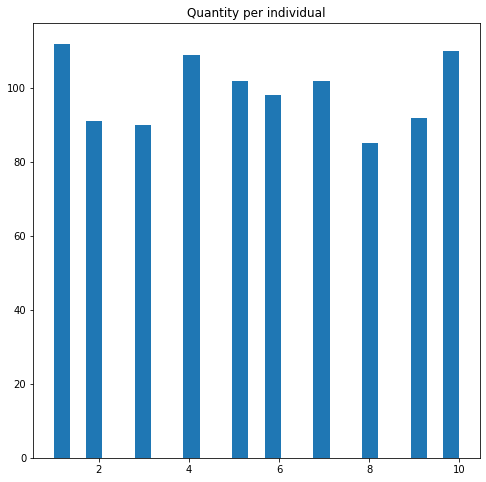

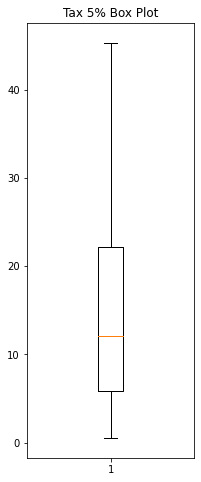

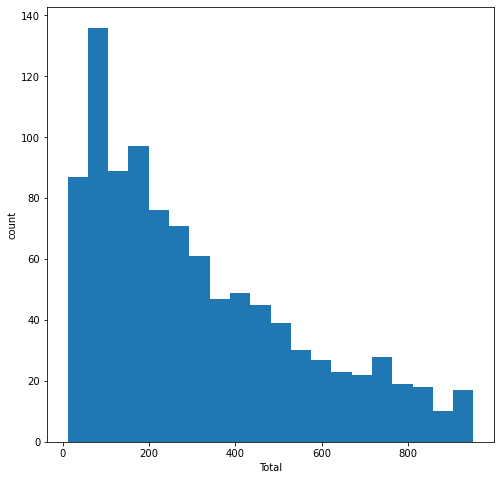

In [123]:
# Costumers' cites 
plt.figure()
sns.countplot(y='City',data=df);
plt.show()
#membership of costumers 
plt.figure()
subj_labels, subj_counts = np.unique(df['Customer type'],return_counts=True)
plt.pie(subj_counts,labels=subj_labels,autopct='%.2f%%')
plt.title('member = 0 ,normal =1')
plt.show()
#the gender distribution of costumers 
plt.figure()
subj_labels, subj_counts = np.unique(df['Gender'],return_counts=True)
plt.pie(subj_counts,labels=subj_labels,autopct='%.2f%%',colors=['purple','blue'])
plt.title('female = 0 ,male =1')
plt.show()
#Products line
plt.figure(figsize= (18,5))
sns.countplot(x=df['Product line'])
plt.show()
#Unit price box plot 
plt.figure(figsize=(3,8))
plt.boxplot(df["Unit price"]) 
plt.title('Unit price Box Plot')
plt.show()
#quantity of products for each costumers
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.hist(df['Quantity'],bins=25)
plt.title('Quantity per individual')
plt.show()
#Tax summary 
plt.figure(figsize=(3,8))
plt.boxplot(df["Tax 5%"]) 
plt.title('Tax 5% Box Plot')
plt.show()
#Total of purchased items
plt.figure(figsize=(8,8))
plt.hist(df["Total"],bins=20) 
plt.xlabel('Total')
plt.ylabel('count')
plt.show()

# iii. Prepare bivariate plots (i.e., plots based on two variables).

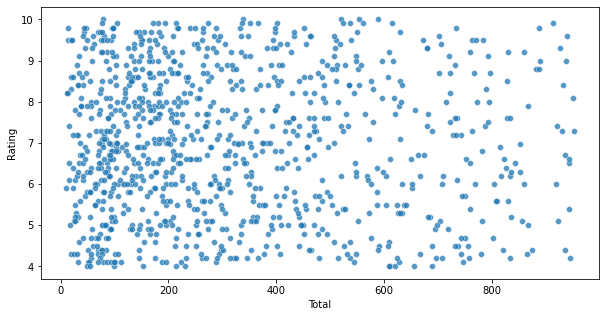

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating vs Total - scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total',y='Rating',
            alpha=0.75,
            data=df)
plt.show()

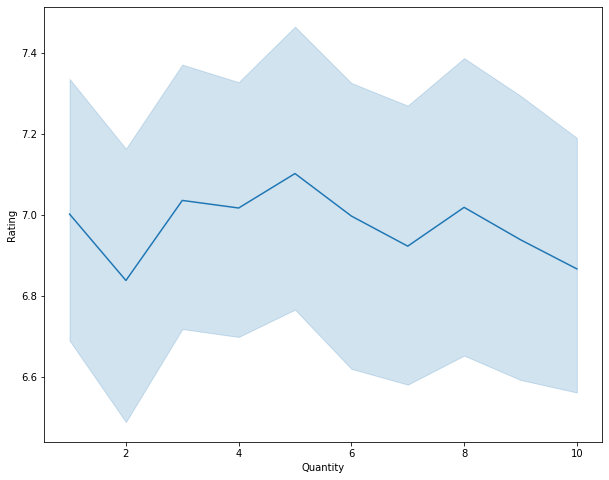

In [125]:
# Rating vs Quantity - lineplot
plt.figure(figsize=(10,8))
sns.lineplot(x='Quantity', y='Rating', data=df) 
plt.show()

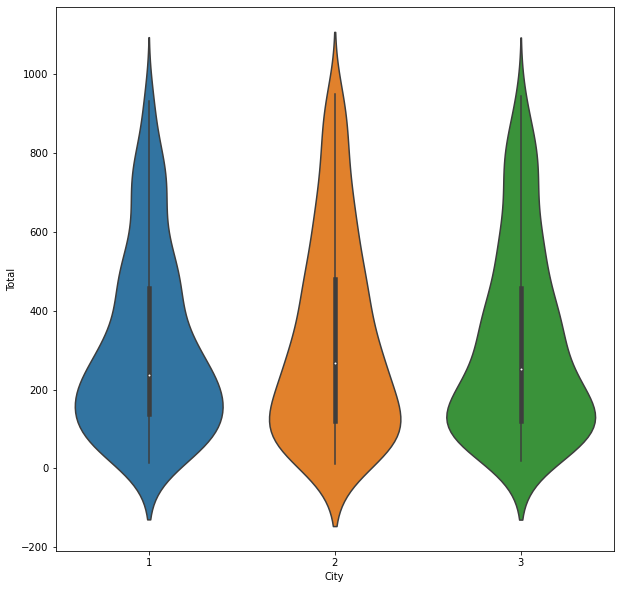

In [126]:
# Total vs City - violinplot
plt.figure(figsize=(10,10))
sns.violinplot(x='City', y='Total', data = df) 
plt.show()

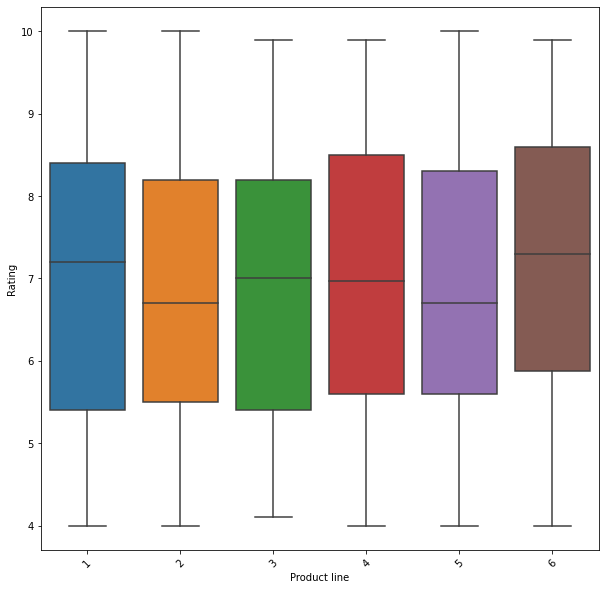

In [127]:
# Product line vs Rating - boxplot
fig =plt.figure(figsize=(10,10))
sns.boxplot(x=df['Product line'], y=df['Rating'])
plt.xticks(rotation=45)
plt.show()

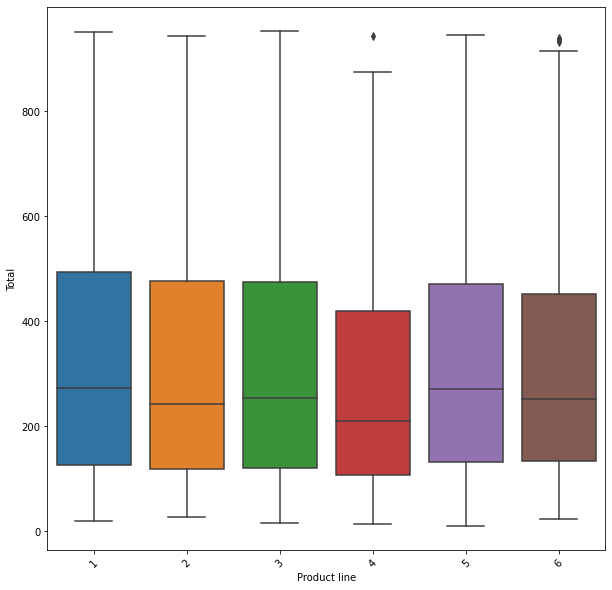

In [128]:
# Product line vs Total - boxplot
fig =plt.figure(figsize=(10,10))
sns.boxplot(x=df['Product line'], y=df['Total'])
plt.xticks(rotation=45)
plt.show()

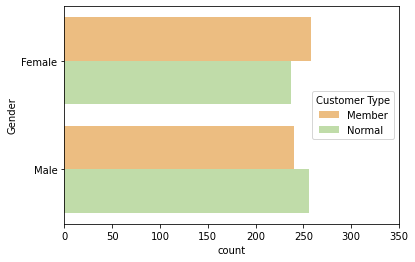

In [129]:
# Customer type vs Gender - countplot
ax = sns.countplot(y=df['Gender'], hue=df['Customer type'], data=df, palette='Spectral')
ax.set_yticklabels(['Female', 'Male'])
plt.legend(title='Customer Type',labels=['Member', 'Normal'], loc='center right')
plt.xlim(0, 350)
plt.show()


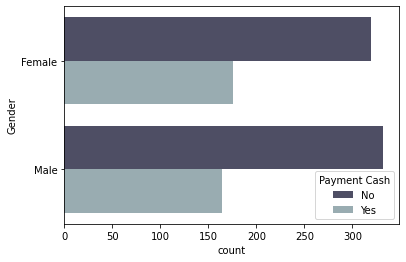

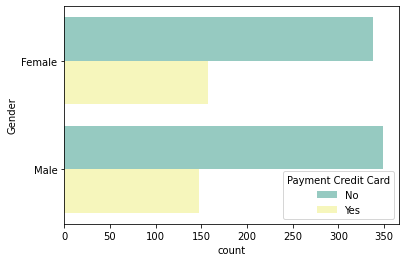

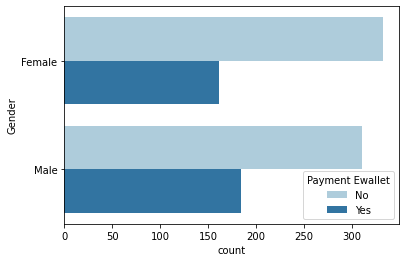

In [130]:
# Gender vs Payment_Cash - countplot
ax = sns.countplot(y=df['Gender'], hue=df['Payment_Cash'], data=df, palette='bone')
ax.set_yticklabels(['Female', 'Male'])
plt.legend(title='Payment Cash',labels=['No', 'Yes'])
plt.show()

# Gender vs Payment_Credit card - countplot
ax = sns.countplot(y=df['Gender'], hue=df['Payment_Credit card'], data=df, palette='Set3')
ax.set_yticklabels(['Female', 'Male'])
plt.legend(title='Payment Credit Card',labels=['No', 'Yes'])
plt.show()

# Gender vs Payment_Ewallet - countplot
ax = sns.countplot(y=df['Gender'], hue=df['Payment_Ewallet'], data=df, palette='Paired')
ax.set_yticklabels(['Female', 'Male'])
plt.legend(title='Payment Ewallet',labels=['No', 'Yes'])
plt.show()

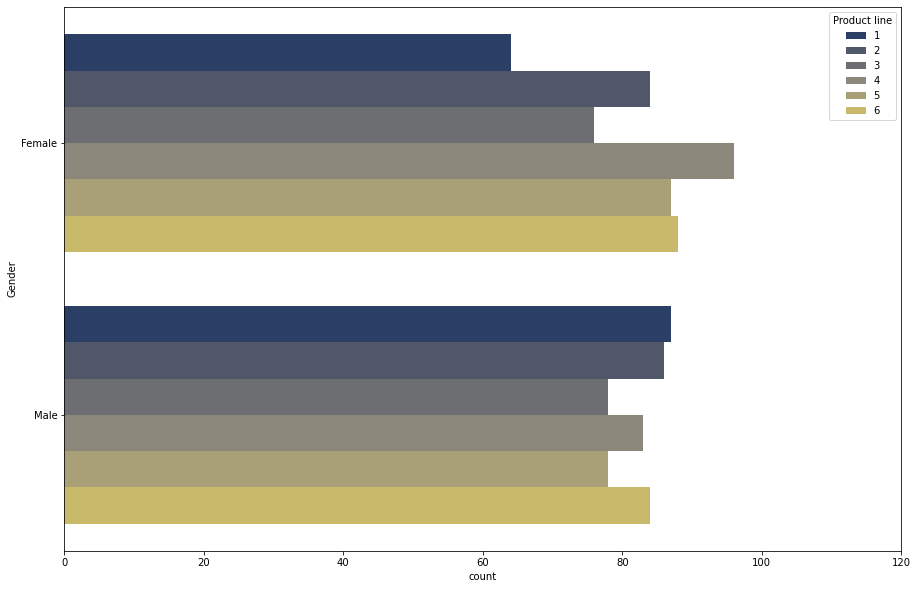

In [131]:
# Gender vs Product line - countplot
fig =plt.figure(figsize=(15,10))
ax = sns.countplot(y=df['Gender'], hue=df['Product line'], data=df, palette='cividis')
ax.set_yticklabels(['Female', 'Male'])
plt.xlim(0, 120)
plt.show()

# iv. Portray advanced graphs (i.e., graphs based on more than two variables).


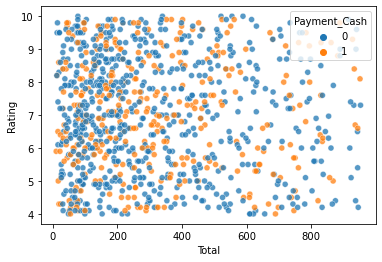

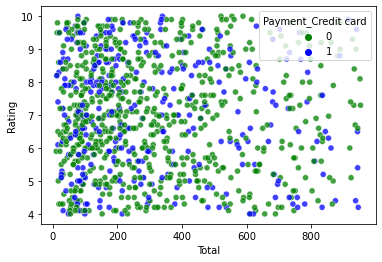

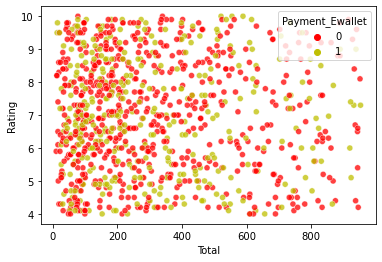

In [132]:
# Rating vs Total differentiated using Payment_Casch
sns.scatterplot(x='Total',y='Rating',
            hue='Payment_Cash',
            alpha=0.75,
            data=df)
plt.show()


# Rating vs Total differentiated using Payment_Credit card
sns.scatterplot(x='Total',y='Rating',
            hue='Payment_Credit card', palette=['g', 'b'],
            alpha=0.75,
            data=df)
plt.show()


# Rating vs Total differentiated using Payment_Ewallet
sns.scatterplot(x='Total',y='Rating',
            hue='Payment_Ewallet', palette=['r', 'y'],
            alpha=0.75,
            data=df)
plt.show()

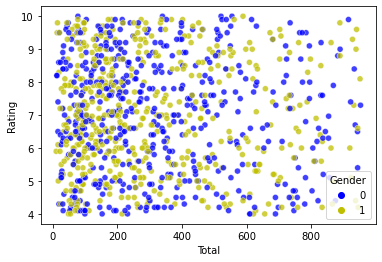

In [133]:
# Rating vs Total differentiated using Payment_Ewallet
sns.scatterplot(x='Total',y='Rating',
            hue='Gender', palette=['b', 'y'],
            alpha=0.75,
            data=df)
plt.show()

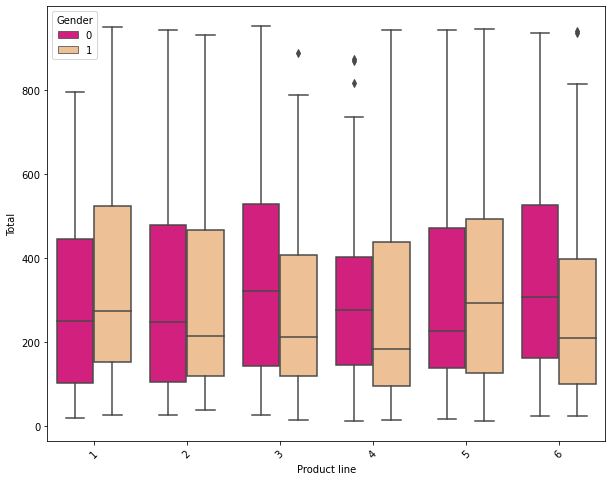

In [134]:
# Total vs Product line differentiated by Gender

plt.figure(figsize=(10,8))
sns.boxplot(y="Total",x="Product line",hue="Gender",data=df, palette='Accent_r')
plt.xticks(rotation=45)
plt.show()


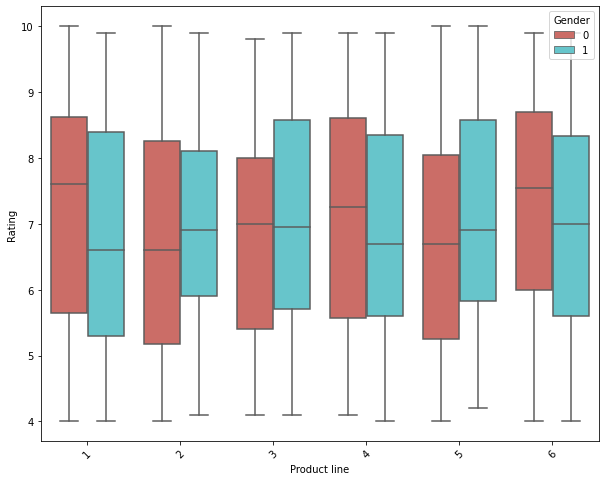

In [135]:
# Rating vs Product line differentiated by Gender

plt.figure(figsize=(10,8))
sns.boxplot(y="Rating",x="Product line",hue="Gender",data=df, palette='hls')
plt.legend(title='Gender',loc='upper right')
plt.xticks(rotation=45)
plt.show()


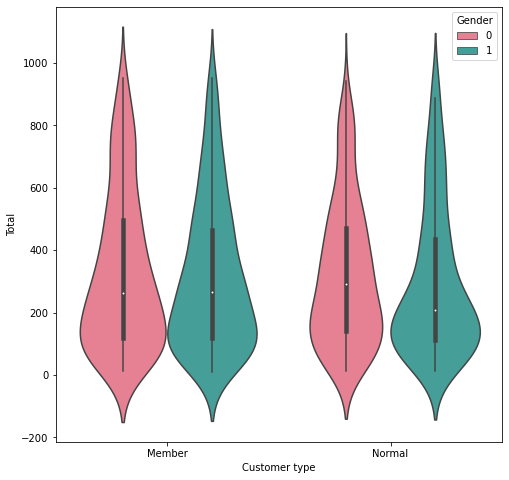

In [136]:
# Total vs Customer type differentiated by Gender
plt.figure(figsize=(8,8))
ax=sns.violinplot(y="Total",x="Customer type",hue="Gender",data=df, palette='husl')
ax.set_xticklabels(['Member', 'Normal'])
plt.show()


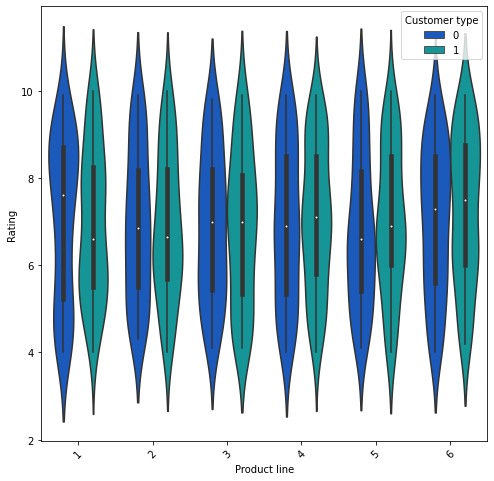

In [137]:
# Rating vs Product line differentiated by Customer type
plt.figure(figsize=(8,8))
ax=sns.violinplot(y="Rating",x="Product line",hue="Customer type",data=df, palette='winter')
plt.xticks(rotation=45)
plt.show()

## v. Assess the relationship between variables.


- According to the given data & illustrated graphs, the number of females members are higher than males. In addition, females intened to spend more money than males in a single purchase. Nevertheless, most of the totals are between 0 to 400 and from the figure of rating vs quantity we can conclude that the rating of service is reached the lowest point in the lowest and highest quantity bought and it has a light oscillation in the middle. 
 

- females spent most of their on fashion, Electronics, sport & travel and food(In summary, their appearance and entertainment). However, males spent money almost equally between the different category.  
- males prefer to use either cash or credit cards over E-wallet. on the other hand, females do not have a prefered way of payment in particular.

<h2>4. Model Building:</h2>

In [138]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

y=df['Gender']
X=df.drop('Gender',axis=1)

k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(tree.DecisionTreeClassifier(random_state=42), X, y, cv= k_folds, scoring='accuracy')
print("the scores for the folds are:", cv_score)
print("The average score is ", cv_score.mean())

k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv= k_folds, scoring='accuracy')
print("the scores for the folds are:", cv_score)
print("The average score is ", cv_score.mean())

#The decision tree classifier has better average score so we will proceed with it.

the scores for the folds are: [0.57286432 0.47474747 0.53030303 0.45959596 0.51515152]
The average score is  0.510532460281204
the scores for the folds are: [0.52763819 0.49494949 0.52020202 0.47979798 0.5       ]
The average score is  0.5045175371808537


In [139]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
np.unique(y_test, return_counts=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')

dtClf = dtClf.fit(X_train,y_train)

dt_y_pred = dtClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))


Accuracy:= 0.65


In [140]:
randomForest_classifier = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=42)
randomForest_classifier = randomForest_classifier.fit(X_train, y_train)
y_pred = randomForest_classifier.predict(X_test)

print("Accuracy:=", accuracy_score(np.array(y_test), y_pred))

Accuracy:= 0.6


<h2>Operationalize</h2>

Based on the information of supermarket's selling the project will predict the gender of the customer.<br>
By knowing the gender who buy a product we will be able to determine the type of advertisement that we may do for a product.<br>
The main concepts are:<br>
<ul>
    <li> Gender
    <li> Product line
</ul>

Gender = Male or Female.<br>
Product line = Health and beauty, Electronic accessories, Home and lifestyle, Fashion accessories, Sports and travel, or Food and beverages.

Problems:
<ul>
    <li> The data has null values.
    <li> The data has inconsistency.
    <li> The data is small.
    <li> The data has a duplication such as city and branch are the same.
</ul>

<h2>Communicate results</h2><br>
- The number of males and females who go to the customer is approximately the same.<br>
- Yangon branch has the largest number of customers.<br>
- The number of normal and member customers is approximately the same.<br>
- Fashion and accessories has the larges number of selling.<br>
- The food and beverages has the largest rating.<br>
- Health and beauty has the larges number of total.<br>
- The female is largest in number of members than males and vise versa.<br>
- The number of females who pay by cash is more than males.<br>
- The number of females who pay by credit card is more than males.<br>
- The number of females who pay by E_wallet is less than males.<br>
- The product that females purchase more than the other products is fashion and accessories.<br>
- The product that males purchase more than the other products is health and beauty.<br>

Recommendations:

  1- The supermarket should put more features that attract men in the supermarket membership in order to increase them.<br>
  2- The supermarket should put more product in the product line in order to attract more customers.<br>
  3- The supermarket should be aware of the things that decrease the rate of the products because the average rating is approximately 7.